In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [6]:
import tensorflow as tf
import os
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg','jpg','png','bmp']

# Remove the other image types 

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

## Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

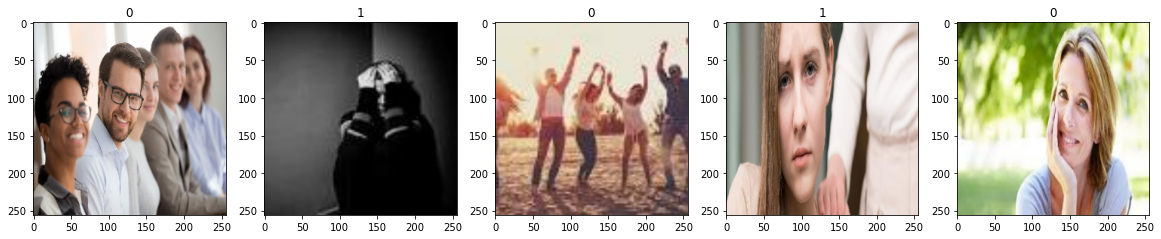

In [14]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale the data

In [15]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.44705883, 0.46666667, 0.49019608],
          [0.44733456, 0.4669424 , 0.49019608],
          [0.45536152, 0.47496936, 0.49065563],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         [[0.44708782, 0.46669567, 0.49022508],
          [0.44972154, 0.4693294 , 0.49258307],
          [0.45536152, 0.47496936, 0.49065563],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         [[0.44861367, 0.46822152, 0.49175093],
          [0.45262715, 0.472235  , 0.49548867],
          [0.4568704 , 0.47647825, 0.49216452],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

## Split data

### define size

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


### Split for subsets

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 857ms/step - loss: 0.7705 - accuracy: 0.5179 - val_loss: 0.6595 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 7s 868ms/step - loss: 0.6540 - accuracy: 0.5446 - val_loss: 0.6617 - val_accuracy: 0.4688
Epoch 3/20
7/7 [==============================] - 7s 788ms/step - loss: 0.6057 - accuracy: 0.6696 - val_loss: 0.5237 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 7s 794ms/step - loss: 0.5333 - accuracy: 0.7768 - val_loss: 0.4583 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 7s 824ms/step - loss: 0.4618 - accuracy: 0.8125 - val_loss: 0.3292 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 7s 841ms/step - loss: 0.3581 - accuracy: 0.8795 - val_loss: 0.4411 - val_accuracy: 0.7344
Epoch 7/20
7/7 [==============================] - 7s 806ms/step - loss: 0.3153 - accuracy: 0.8661 - val_loss: 0.2852 - val_accuracy: 0.9062
Epoch 8/20
7/7 [====

# Plot performance

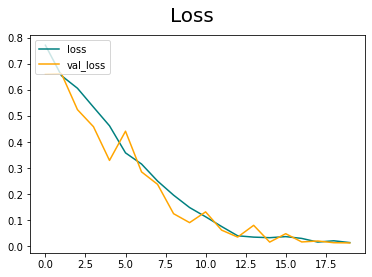

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

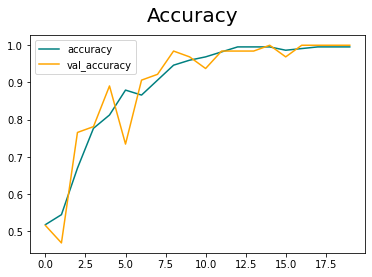

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 397ms/step


In [31]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Test

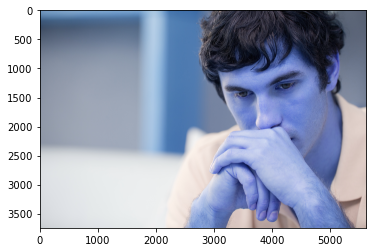

In [36]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

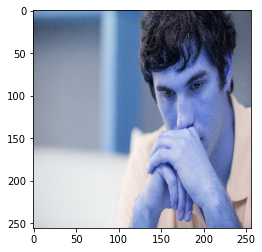

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 92ms/step


In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
